In [133]:
import numpy as np
import matplotlib.pyplot as plt
from helper import load_data, get_popular_best_movies
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
%matplotlib inline

In [134]:
data, titles, movies_data, genres = load_data('data/data.txt', 'data/movies.txt')
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

In [135]:
years = []
for m in titles:
    m = m.rstrip('"')
    year = m[-5:][:4]
    try:
        year = int(year)
        if year not in years:
            years.append(year)
    except (TypeError, ValueError):
        pass

In [136]:
# For each movie, add the genres it qualifies as for its corresponding year
years_genre = np.zeros([max(years) - min(years),19])

for a in range(len(movies_data)):
    movie_title = titles[a]
    movie_genre = movies_data[a]
    for y in years:
        if str(y) in movie_title:
            years_genre[y - (min(years) + 1)] += np.array(movie_genre)

In [137]:
# Normalize the number of movies per genre per year
for i, year in enumerate(years_genre):
    mov_per_year = np.sum(year)
    if mov_per_year != 0:
        years_genre[i] = year / mov_per_year

In [142]:
df = pd.DataFrame(years_genre, columns = genres)

TypeError: __init__() got an unexpected keyword argument 'rows'

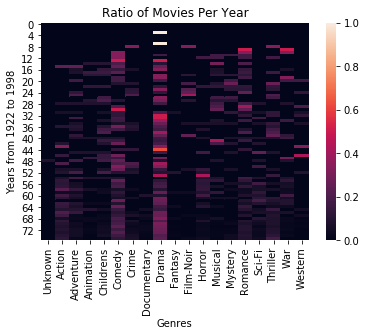

In [141]:
hm = sns.heatmap(df)
hm.axes.set_title("Ratio of Movies Per Year")
hm.axes.set_xlabel("Genres")
hm.axes.set_ylabel("Years Since 1922 to 1998")
fig = hm.get_figure()
fig.savefig('images/heat_map_movies_per_year.png', dpi = 300)